In [1]:
import sys
import json
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony","2TB", "dardel","current_bgd2","population_unit", "surround_inhibition", "supercomputer", "networks")

In [3]:
cell_ids = json.load(open(os.path.join("..", "..","..","..","networks", "pdc_network_2022-08-31", "cell_ids_dardel_p1.json")))

In [4]:
folder = "frequency"

In [5]:
parameters = {"start": 0.5, "end": 2.5}

In [6]:
e = Experiments()
e.add_experiment(name="p1",
                 color="black",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty.hdf5")
e.add_experiment(name="p1_p2",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31"),
                 output="network_output_110mV_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-12-30-12-53-34_presynaptic_to_p1.hdf5")


   

In [7]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/surround_inhibition/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_external-input-dardel-2022-10-25-12-00-58-p1_empty.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/surround_inhibition/supercomputer/networks/pdc_network_2022-08-31/simulation/network_output_110mV_external-input-dardel-2022-10-25-12-00-58-p1_cell_ids_current_injection_dardel_2022-12-30-12-53-34_presynaptic_to_p1.hdf5


In [8]:
neuron_type="SPN"
specific_trace_ids = {k: cell_ids["iSPN"][::10]+cell_ids["dSPN"] for k in e.experiments}
dt_step=0.5

In [9]:
%%time
dendritic_voltage = dendrite_voltage(data_obj=sl, 
                                     neuron_type=neuron_type, 
                                     specific_trace_ids=specific_trace_ids,
                                     interval=[0.2, 2.5], 
                                     dt_step=dt_step)

average_dendritic_voltages = average_dendritic_voltage(dvoltage=dendritic_voltage)


  SPN and 187 traces
  SPN and 187 traces
CPU times: user 7.83 s, sys: 428 ms, total: 8.26 s
Wall time: 11.4 s


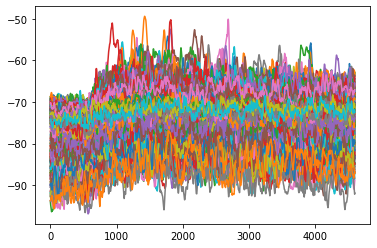

In [10]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        
        if np.max(dendritic_voltage[exp][cell_id][1]) < -45:
            plt.plot(v)
            v_s.append(v[skip:])
        
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jofrony/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


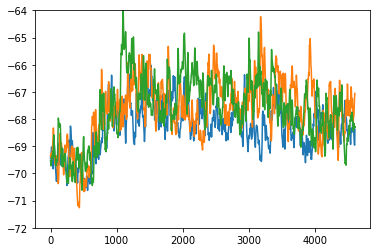

In [11]:
tmp = dict()
tmp_corrected = dict()
skip = 500
cell_list = list()
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        
        if np.max(dendritic_voltage[exp][cell_id][1][:300]) < -64 and np.min(dendritic_voltage[exp][cell_id][1][:300]) > -72:
            cell_list.append([cell_id, exp])
            plt.plot(v)
            v_s.append(v[skip:])
            plt.ylim((-72,-64))
        
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

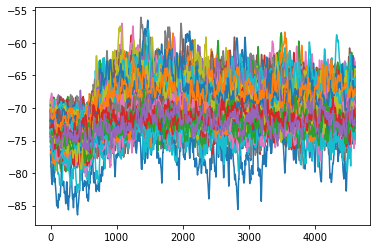

In [13]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np

v_s = list()
data = average_dendritic_voltages["p1_p2"]
for cell_id, v in data.items():

    if np.max(dendritic_voltage[exp][cell_id][1]) < -45:
        plt.plot(v)
        v_s.append(v[skip:])

tmp.update({exp: np.mean(v_s, axis=0)})
tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

In [14]:
cell_list

[[8285, 'p1_p2'], [11960, 'p1_p2'], [15529, 'p1_p2']]

In [15]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        v_s.append(v[skip:])
        
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

In [18]:
cs = {"p1": 'black', 
      "p1_p2": 'red'}

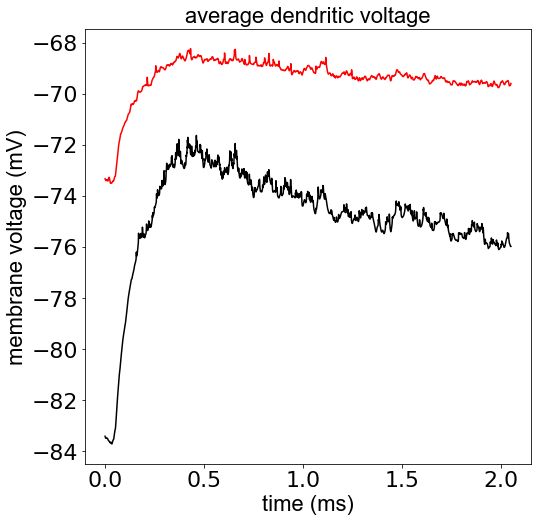

In [19]:
plot_average_dendritic_voltage(tmp, name="dSPN", colors=cs, dt_step=0.5e-3)

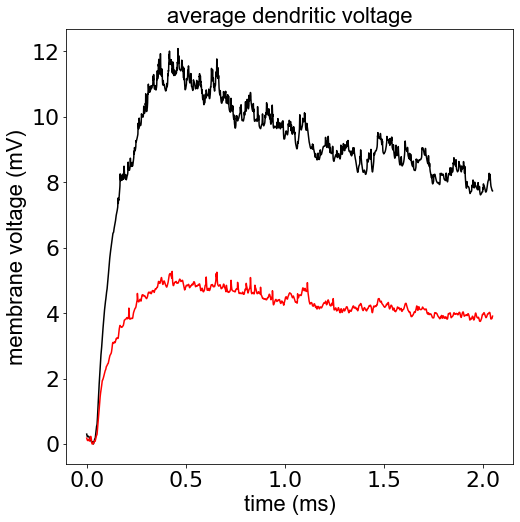

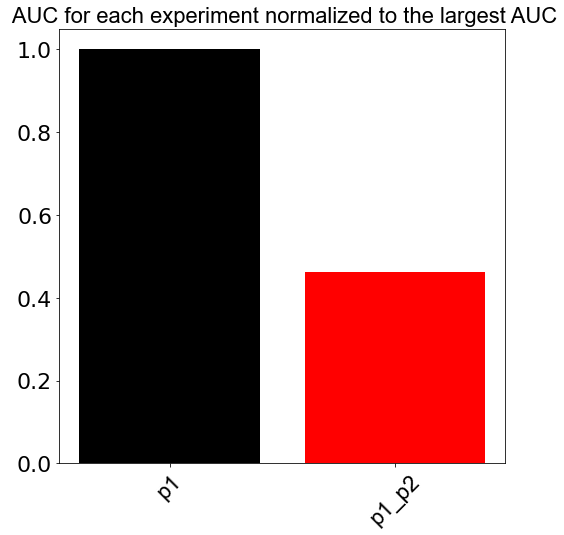

In [20]:

plot_average_dendritic_voltage(tmp_corrected, name="dSPN", colors=cs, dt_step=0.5e-3)
auc = calculate_AUC(tmp, parameters={"dx":0.5e-3})
plot_AUC(auc, experiment_names=e,colors=cs, name="dSPN")